In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#find availabe data sets in seaborn 
print(sns.get_dataset_names())



['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [16]:
#step 1 - collect the data
df = sns.load_dataset('flights')
print(df.head())
print(df.tail())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432


In [17]:
# step 2 - convert coloumns to time serise and make it index colunm
# we cant process with date loke 1949 Jan, it process with 1949-01-01 or 01-01-1949

df['yearMonth'] = "01-" + df['month'].astype(str) + "-" + df['year'].astype(str)

df.info() #gives yearMonth coloums in object format

# Convert yearMonth coloums in datetime format
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
df.set_index('yearMonth', inplace=True) #make it index colunm
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


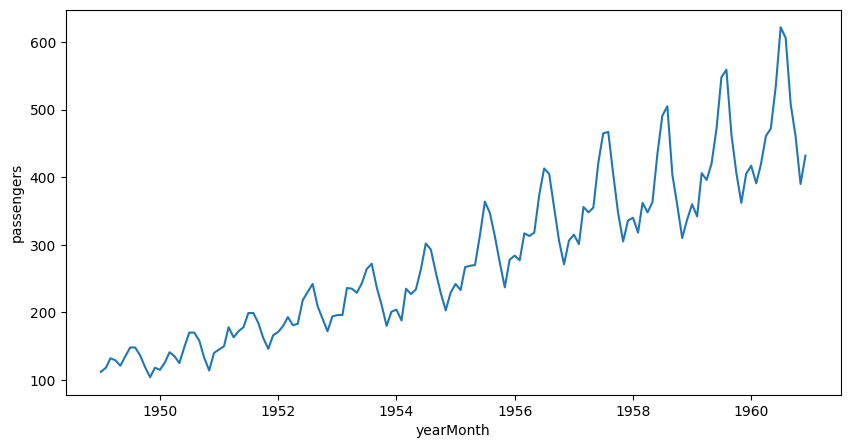

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_19236\423316376.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


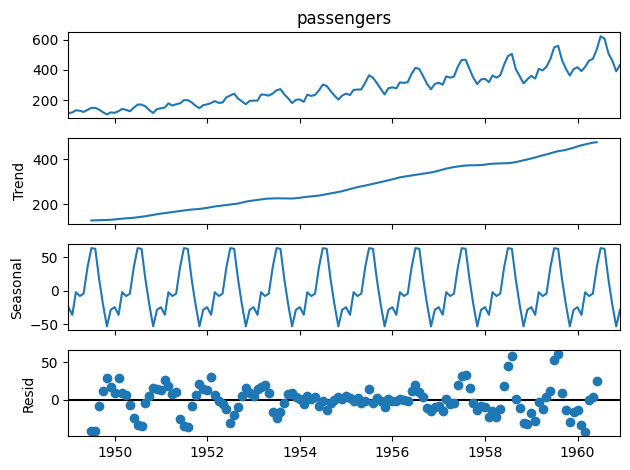

In [ ]:
#step4 - visulize time serise
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
plt.show()

# checking for seasonality and trend by doing decomposition
#pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers)
plot = decomposition.plot()
plot.show()

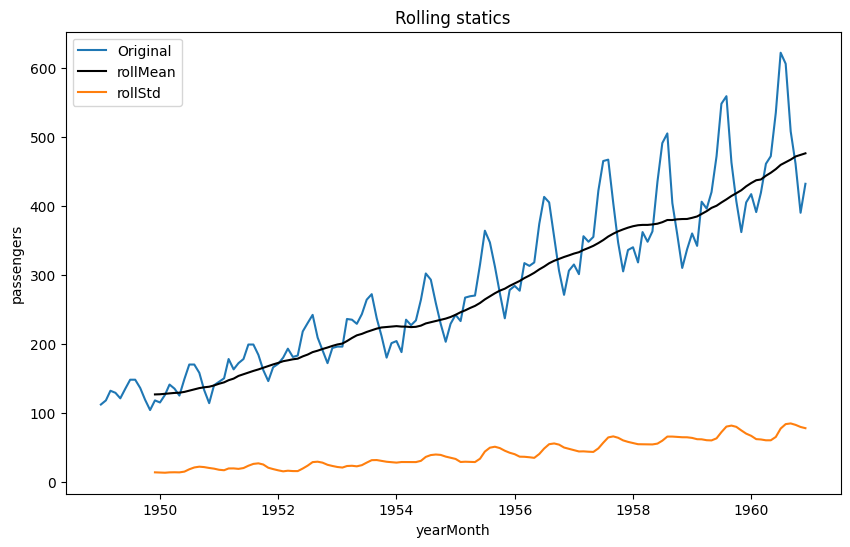

            year month  passengers    rollMean    rollStd
yearMonth                                                
1960-08-01  1960   Aug         606  463.333333  83.630500
1960-09-01  1960   Sep         508  467.083333  84.617276
1960-10-01  1960   Oct         461  471.583333  82.541954
1960-11-01  1960   Nov         390  473.916667  79.502382
1960-12-01  1960   Dec         432  476.166667  77.737125


In [19]:
#cheking wheater time serise is stationary or not
#rolling mean anad std dev for 12 month
df['rollMean'] = df.passengers.rolling(window=12).mean() #calculate the mean of previous 12 month(Use for smoothing the data)
df['rollStd'] = df.passengers.rolling(window=12).std() #calculate the std of previous 12 month

#plot original serise with rolling mean and std
plt.figure(figsize=(10,6))
sns.lineplot(data = df, x=df.index, y=df.passengers, label = 'Original')
sns.lineplot(data = df, x=df.index, y=df.rollMean, label = 'rollMean', color = 'black')
sns.lineplot(data = df, x=df.index, y=df.rollStd, label = 'rollStd')
plt.title("Rolling statics")
plt.show()
print(df.tail())

#time serise consider stesionary for rolling mean and std dev line are like a streight line///(1) mean is not in straight
#line,...(2) std deviation is in a straight line ......
#Conclusion: out time series is not stationary
#If a time series is not stationary, we cannot make prediction about the future datas....


(np.float64(0.8153688792060482), np.float64(0.991880243437641), 13, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(996.692930839019))
ADF value: 0.9919
time serise is not stationary(H0 not accept)


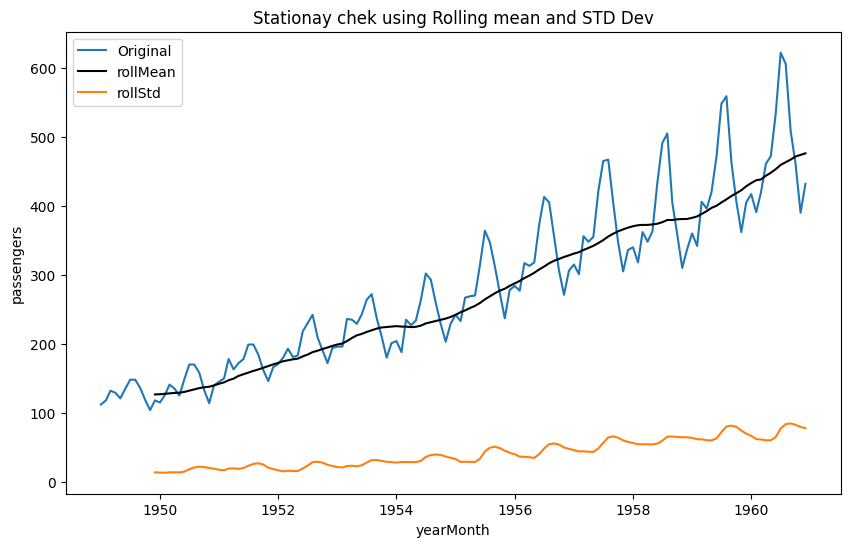

            year month  passengers    rollMean    rollStd
yearMonth                                                
1960-08-01  1960   Aug         606  463.333333  83.630500
1960-09-01  1960   Sep         508  467.083333  84.617276
1960-10-01  1960   Oct         461  471.583333  82.541954
1960-11-01  1960   Nov         390  473.916667  79.502382
1960-12-01  1960   Dec         432  476.166667  77.737125


In [20]:
#define function for stationary chek 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(dataFrame, col):
    df['rollMean'] = dataFrame[col].rolling(window=12).mean()
    df['rollStd'] = dataFrame[col].rolling(window=12).std()

    adf_result = adfuller(dataFrame[col])
    print(adf_result)
    p_value = adf_result[1]

    print(f"ADF value: {p_value:.4f}")

    if p_value < 0.05:
        print("time serise is stationary(H0 accept)")
    else:
        print("time serise is not stationary(H0 not accept)")

    #plot original serise with rolling mean and std
    plt.figure(figsize=(10,6))
    sns.lineplot(data = df, x=df.index, y=df.passengers, label = 'Original')
    sns.lineplot(data = df, x=df.index, y=df.rollMean, label = 'rollMean', color = 'black')
    sns.lineplot(data = df, x=df.index, y=df.rollStd, label = 'rollStd')
    plt.title("Stationay chek using Rolling mean and STD Dev")
    plt.show()
    print(df.tail())

test_stationarity(df, 'passengers')


            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0
(np.float64(-2.8292668241699994), np.float64(0.0542132902838255), 12, 130, {'1%': np.float64(-3.48

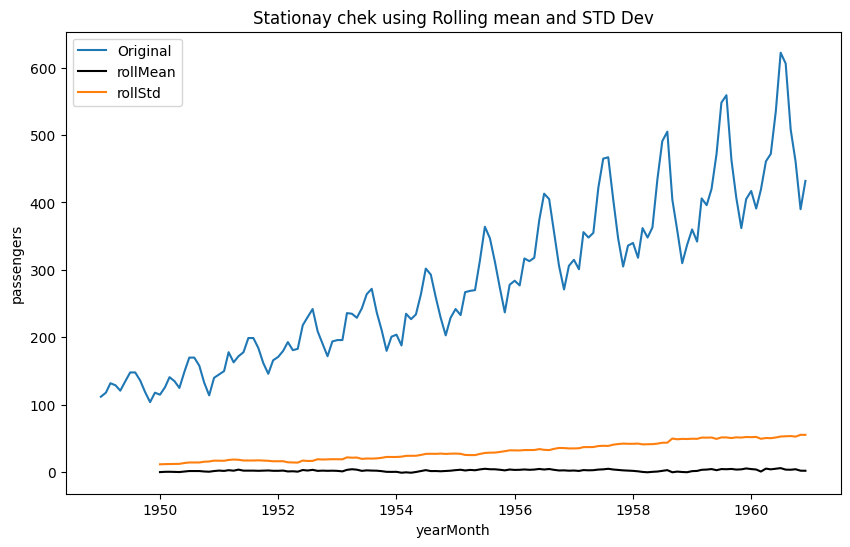

            year month  passengers  rollMean    rollStd
yearMonth                                              
1960-08-01  1960   Aug         606  3.916667  53.364030
1960-09-01  1960   Sep         508  3.750000  53.706483
1960-10-01  1960   Oct         461  4.500000  52.852281
1960-11-01  1960   Nov         390  2.333333  55.531045
1960-12-01  1960   Dec         432  2.250000  55.465182


In [ ]:
#step5 - making data statinory
air_df = df[['passengers']].copy()
air_df.head()

# #try a shif-diff of 1
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

test_stationarity(air_df.dropna(), 'shiftDiff')
#still p_value is greater than 0.05 so consider data is not stationary

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0
(np.float64(-2.8292668241699994), np.float64(0.0542132902838255), 12, 130, {'1%': np.float64(-3.48

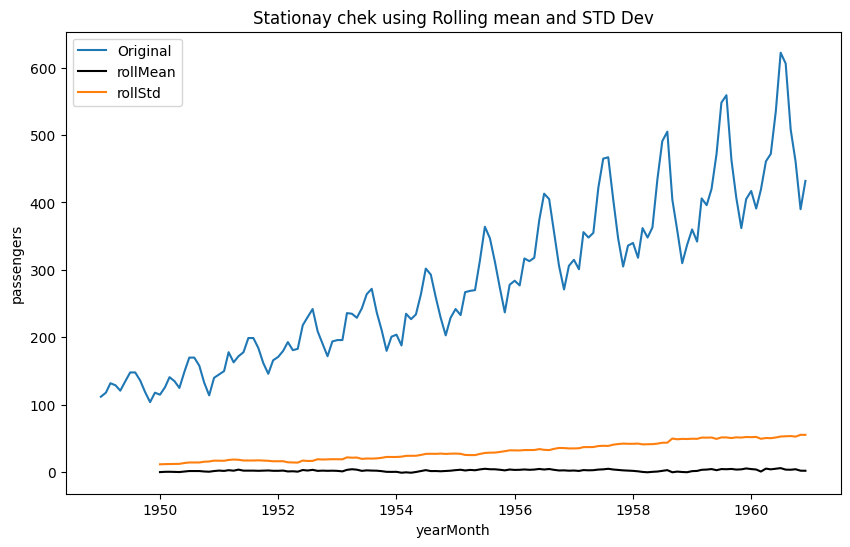

            year month  passengers  rollMean    rollStd
yearMonth                                              
1960-08-01  1960   Aug         606  3.916667  53.364030
1960-09-01  1960   Sep         508  3.750000  53.706483
1960-10-01  1960   Oct         461  4.500000  52.852281
1960-11-01  1960   Nov         390  2.333333  55.531045
1960-12-01  1960   Dec         432  2.250000  55.465182


In [36]:
air_df = df[['passengers']].copy()
air_df.head()

# #try a shif-diff of 2
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

test_stationarity(air_df.dropna(), 'shiftDiff')

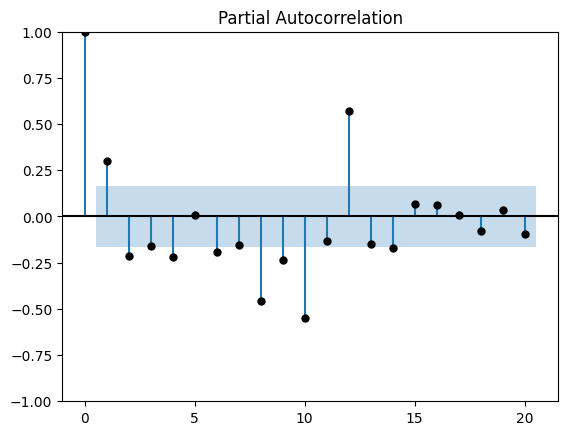

In [ ]:
#ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(air_df['shiftDiff'].dropna(), lags=20, color = 'black')
plt.show()

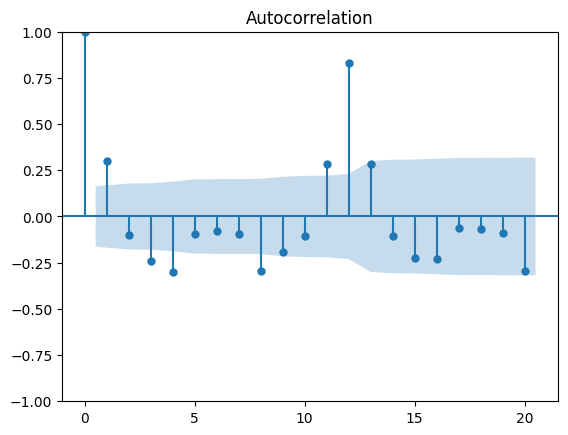

In [43]:
plot_acf(air_df['shiftDiff'].dropna(), lags=20)
plt.show()

In [46]:
#Build ARIMA Model
train = air_df[:round(len(air_df)*70/100)] # take the first 70% data
print(train.tail())

            passengers  shift  shiftDiff
yearMonth                               
1957-01-01         315  306.0        9.0
1957-02-01         301  315.0      -14.0
1957-03-01         356  301.0       55.0
1957-04-01         348  356.0       -8.0
1957-05-01         355  348.0        7.0


In [47]:
test = air_df[round(len(air_df)*70/100):] # take the last 30% data
print(test.tail())

            passengers  shift  shiftDiff
yearMonth                               
1960-08-01         606  622.0      -16.0
1960-09-01         508  606.0      -98.0
1960-10-01         461  508.0      -47.0
1960-11-01         390  461.0      -71.0
1960-12-01         432  390.0       42.0


In [ ]:
model = ARIMA(train['passengers'],order=(1,2,1)) #paramenters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['arimaPred'] = prediction
air_df['PredDiff'] = air_df['arimaPred'] - air_df['passengers']
print(air_df.tail(30))

            passengers  shift  shiftDiff   arimaPred    PredDiff
yearMonth                                                       
1958-07-01         491  435.0       56.0  390.617107 -100.382893
1958-08-01         505  491.0       14.0  393.070438 -111.929562
1958-09-01         404  505.0     -101.0  395.523768   -8.476232
1958-10-01         359  404.0      -45.0  397.977098   38.977098
1958-11-01         310  359.0      -49.0  400.430429   90.430429
1958-12-01         337  310.0       27.0  402.883759   65.883759
1959-01-01         360  337.0       23.0  405.337090   45.337090
1959-02-01         342  360.0      -18.0  407.790420   65.790420
1959-03-01         406  342.0       64.0  410.243750    4.243750
1959-04-01         396  406.0      -10.0  412.697081   16.697081
1959-05-01         420  396.0       24.0  415.150411   -4.849589
1959-06-01         472  420.0       52.0  417.603742  -54.396258
1959-07-01         548  472.0       76.0  420.057072 -127.942928
1959-08-01         559  5

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


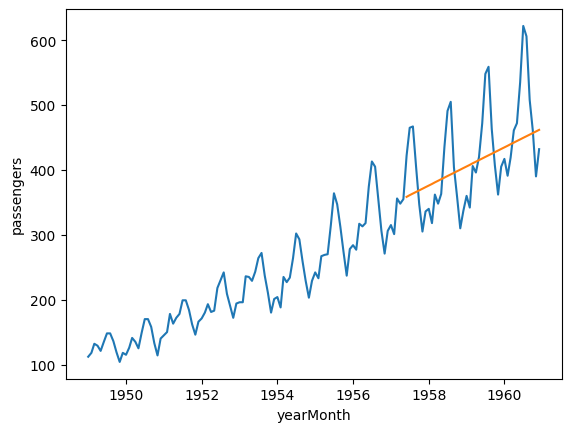

In [54]:
#Plotting the  ARIMA
sns.lineplot(data=air_df, x = air_df.index, y='passengers')
sns.lineplot(data=air_df, x = air_df.index, y='arimaPred')
plt.show()

In [74]:
#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(train['passengers'],order=(1,2,1), seasonal_order=(1,2,1,12))
model_fit = model_sarimax.fit()
prediction_s = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['sarimaxPred'] = prediction_s
# air_df['PredDiff'] = air_df['arimaPred'] - air_df['passengers']
print(air_df.tail(30))

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  shift  shiftDiff   arimaPred   PredDiff  sarimaxPred
yearMonth                                                                   
1958-07-01         491  435.0       56.0  510.811456  19.811456   510.811456
1958-08-01         505  491.0       14.0  496.798393  -8.201607   496.798393
1958-09-01         404  505.0     -101.0  437.662595  33.662595   437.662595
1958-10-01         359  404.0      -45.0  381.044906  22.044906   381.044906
1958-11-01         310  359.0      -49.0  338.286617  28.286617   338.286617
1958-12-01         337  310.0       27.0  380.767056  43.767056   380.767056
1959-01-01         360  337.0       23.0  391.089220  31.089220   391.089220
1959-02-01         342  360.0      -18.0  372.121639  30.121639   372.121639
1959-03-01         406  342.0       64.0  434.163471  28.163471   434.163471
1959-04-01         396  406.0      -10.0  425.308552  29.308552   425.308552
1959-05-01         420  396.0       24.0  435.572167  15.572167   435.572167

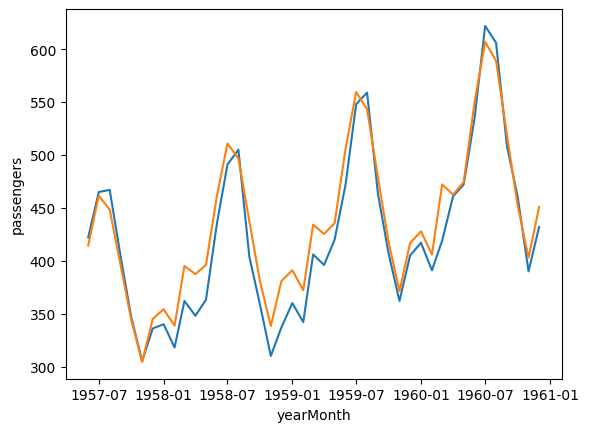

In [75]:
#Plotting the  ARIMA
sns.lineplot(data=air_df, x = air_df.index, y='passengers')
sns.lineplot(data=air_df, x = air_df.index, y='arimaPred')
plt.show()

In [61]:
df.head()

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [76]:
#Monthlys start frequency 
#Create data frame to hold index value from 01-01-1961 to 01-12-1962
futureData = pd.DataFrame(pd.date_range(start= '1961-01-01', end = '1962-12-01'),columns = ['Dates'])
futureData.set_index('Dates', inplace= True)
futureData.head()

""
Dates
1961-01-01
1961-01-02
1961-01-03
1961-01-04
1961-01-05


In [68]:
#predict and print 
prediction_future = model_fit.predict(start=futureData.index[0], end=futureData.index[-1])
print(prediction_future)

1961-01-01    462.636892
1961-02-01    437.631897
1961-03-01    508.427858
1961-04-01    497.812280
1961-05-01    511.119207
1961-06-01    591.758242
1961-07-01    652.428434
1961-08-01    632.117102
1961-09-01    555.946704
1961-10-01    485.456743
1961-11-01    432.104421
1961-12-01    482.673781
1962-01-01    495.077254
1962-02-01    466.923218
1962-03-01    542.070675
1962-04-01    530.450612
1962-05-01    545.180852
1962-06-01    630.864230
1962-07-01    694.987635
1962-08-01    672.533927
1962-09-01    590.472346
1962-10-01    515.170179
1962-11-01    458.196422
1962-12-01    511.254700
Freq: MS, Name: predicted_mean, dtype: float64


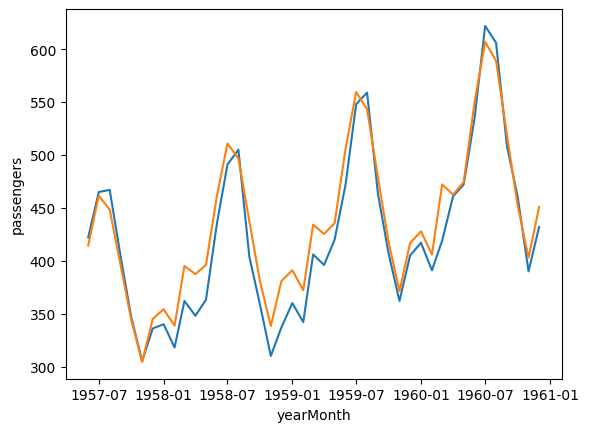

In [80]:
#Plotting the  ARIMA
sns.lineplot(data=air_df, x = air_df.index, y='passengers')
sns.lineplot(data=air_df, x = air_df.index, y='arimaPred')
plt.show()

In [79]:
#model evaluation 
air_df = air_df.dropna()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# armis Evaluation
mae = mean_absolute_error(air_df['passengers'], air_df['arimaPred'])
rmae = mean_squared_error(air_df['passengers'], air_df['arimaPred'])
r2 = r2_score(air_df['passengers'], air_df['arimaPred'])

print(f"ARMIS MAE: {mae}, RMAE: {rmae}, r2: {r2}")

ARMIS MAE: 18.510632696432765, RMAE: 486.53649238990323, r2: 0.9172007738649116


In [78]:
# sarimax Evaluation
mae = mean_absolute_error(air_df['passengers'], air_df['sarimaxPred'])
rmae = mean_squared_error(air_df['passengers'], air_df['sarimaxPred'])
r2 = r2_score(air_df['passengers'], air_df['sarimaxPred'])

print(f"ARMIS MAE: {mae}, RMAE: {rmae}, r2: {r2}")

ARMIS MAE: 18.510632696432765, RMAE: 486.53649238990323, r2: 0.9172007738649116
